In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import norm
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from config import ORDER

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

df_sample = pd.read_csv("../data/focal_papers.csv")
df_generated = pd.read_csv("../data/generated_references.csv")
df_ground_truth = pd.read_csv("../data/ground_truth_references.csv")

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_30020/2651536179.py:18: DtypeWarning: Columns (4,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_generated = pd.read_csv("../data/generated_references.csv")


In [2]:
# additional computations
number_of_papers_per_field = df_sample.groupby("top_field").size()
number_of_papers_per_year = df_sample.groupby("Year").size()

# median_refs_per_year_field.stack().quantile([0.025, 0.975])
median_refs_per_year_field = df_sample.groupby(
    ["Year", "top_field"]
)["Reference_Count"].median().unstack()
median_refs_per_year_field[median_refs_per_year_field > 39] = 39
median_refs_per_year_field[median_refs_per_year_field < 7] = 7

# median_team_size_per_year_field.stack().quantile([0.025, 0.975])
median_team_size_per_year_field = df_sample.groupby(
    ["Year", "top_field"]
)["Team_Size"].median().unstack()
median_team_size_per_year_field[median_team_size_per_year_field > 6] = 6
median_team_size_per_year_field[median_team_size_per_year_field < 1] = 1

# reorder
number_of_papers_per_field = number_of_papers_per_field[ORDER]
median_refs_per_year_field = median_refs_per_year_field[ORDER]
median_team_size_per_year_field = median_team_size_per_year_field[ORDER]

Text(-0.08, 1.3, '\\textbf{b}')

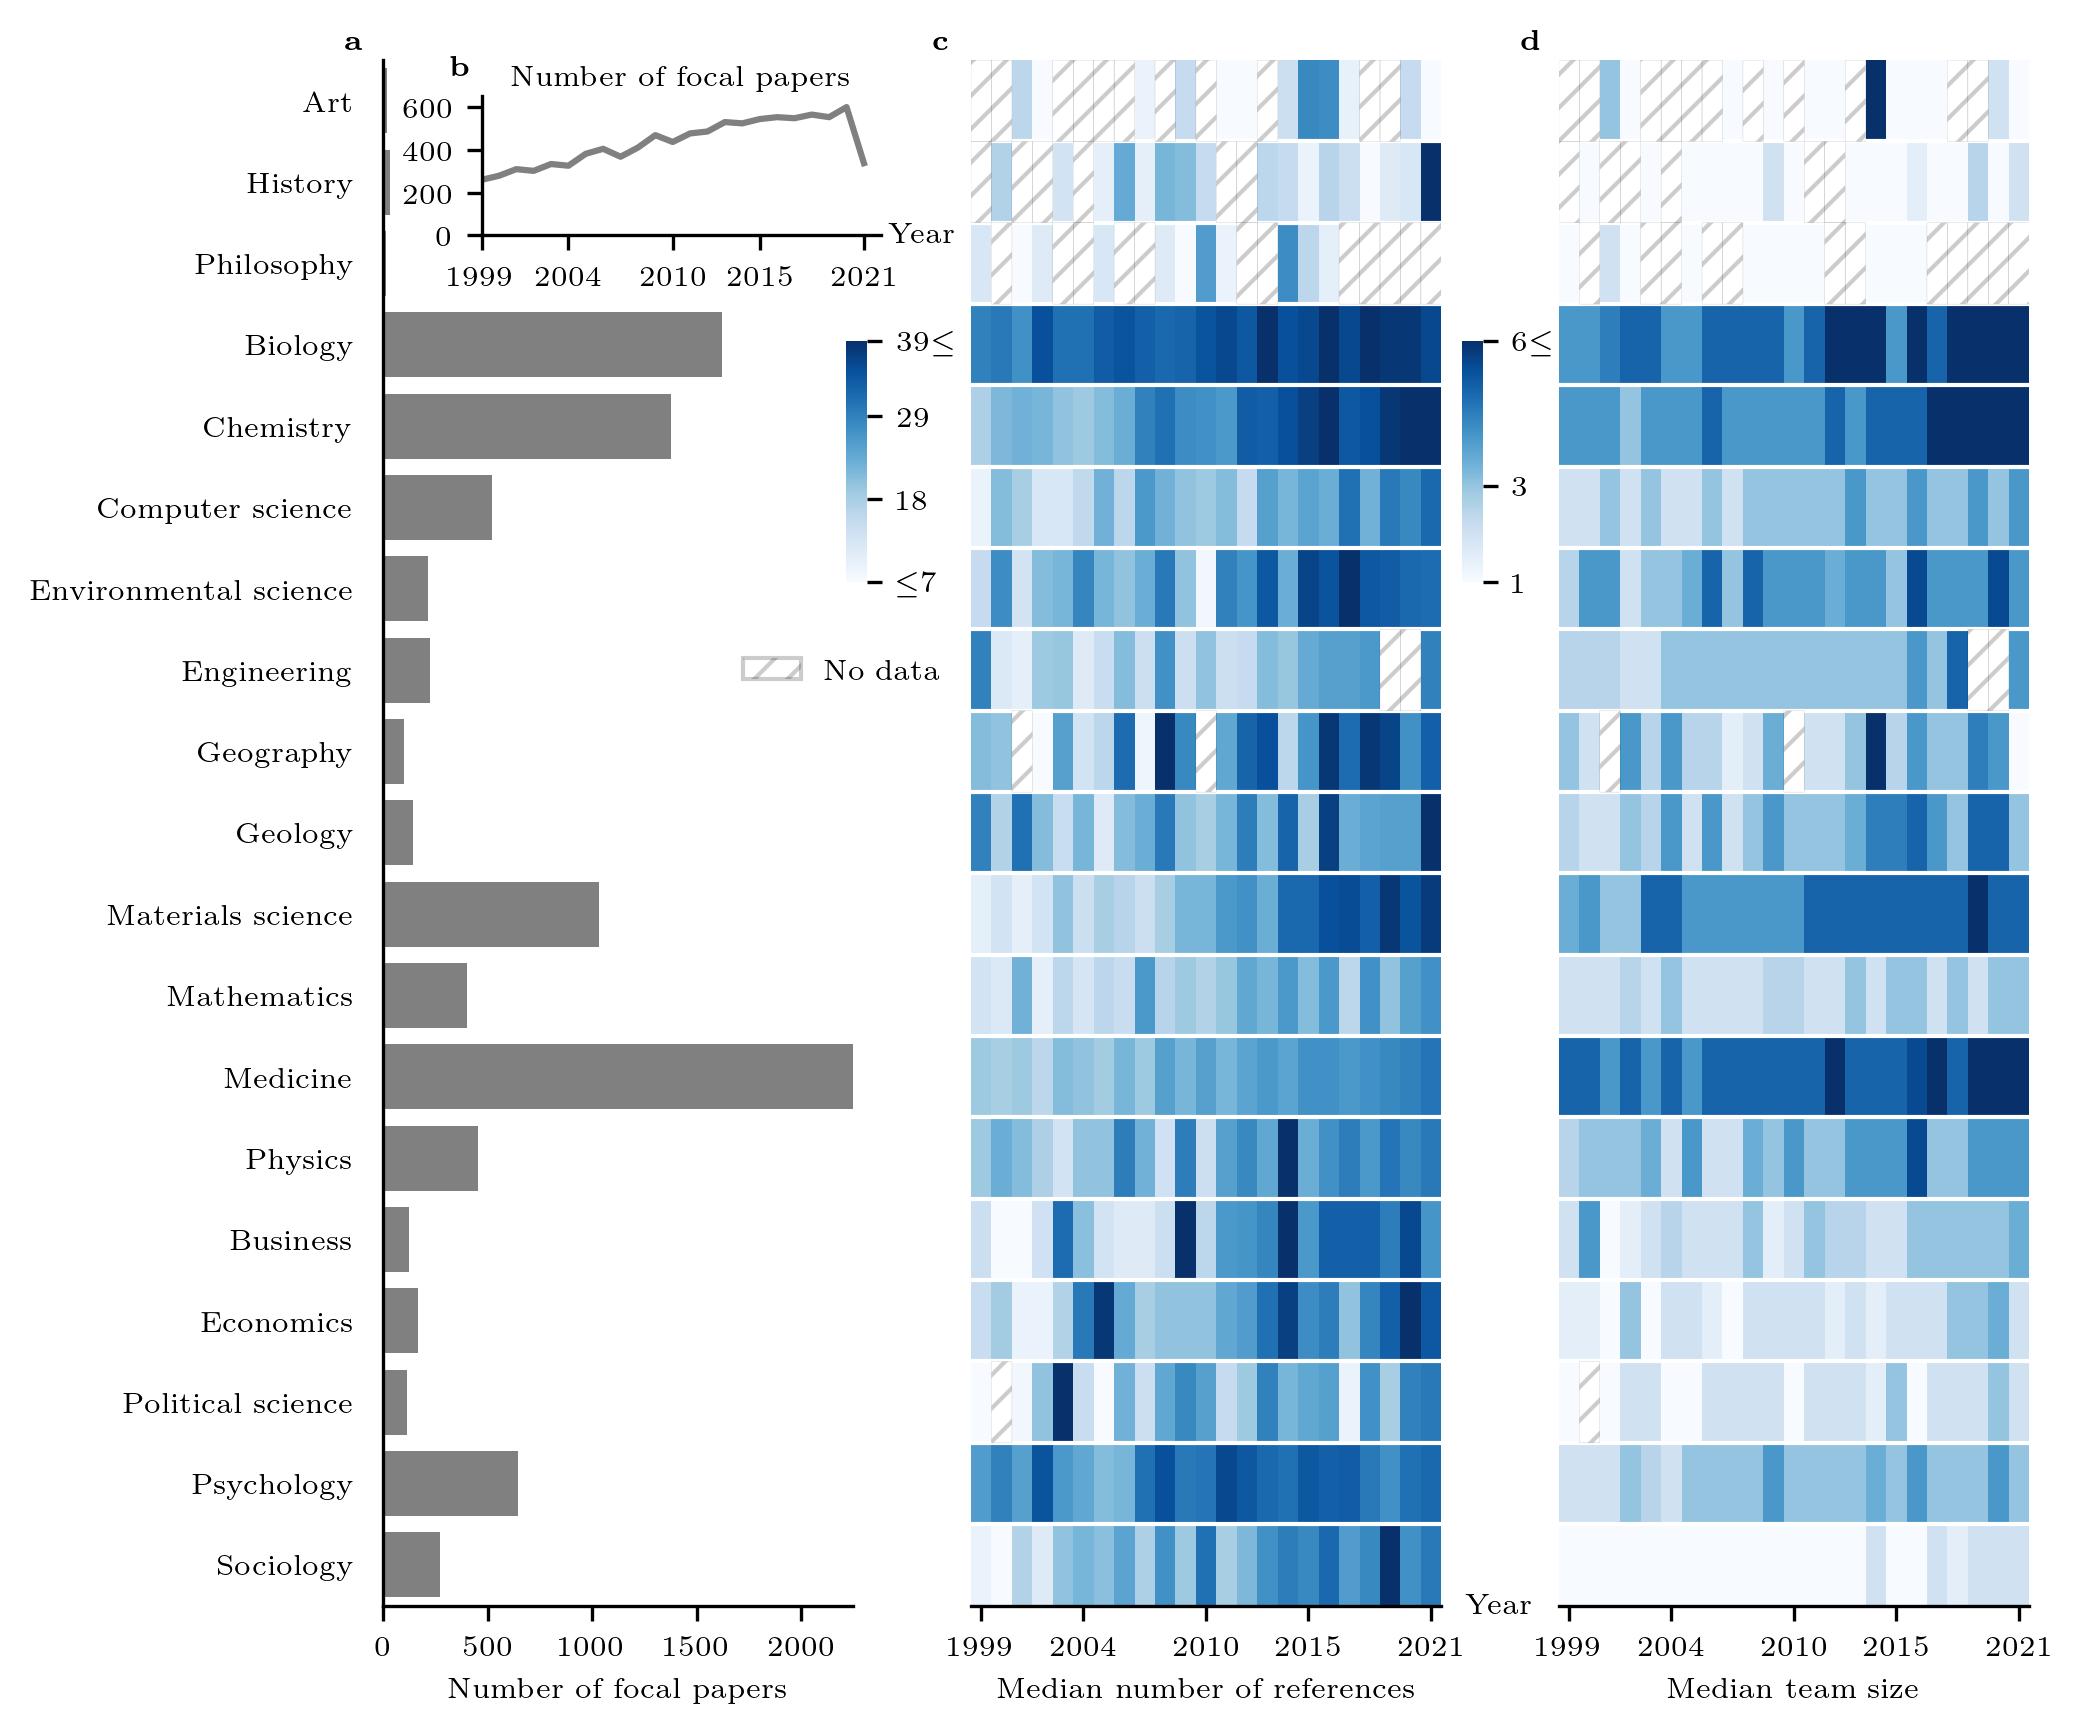

In [3]:
Figure1, ax1 = plt.subplot_mosaic(
    [
        ['A', 'B', 'C'],
    ],
    figsize=(7.08, 6.69),
    dpi=300,
    gridspec_kw={'wspace': 0.25, 'hspace': 0.25},  # Adjust spacing
)

# Bar plot in panel A
sns.barplot(
    x=number_of_papers_per_field.values,
    y=number_of_papers_per_field.index,
    color="#808080",
    ax=ax1["A"],
)
ax1["A"].tick_params(left=False)
ax1["A"].set_xlabel("Number of focal papers", fontsize=7)
ax1["A"].set(xlim=(0, 2250))
ax1["A"].set_ylabel("", fontsize=7)
ax1["A"].set_yticks(list(range(number_of_papers_per_field.index.size)))
ax1["A"].set_yticklabels(
    labels=[], fontsize=7,
)
ax1["A"].set_xticks(
    [0, 500, 1000, 1500, 2000],
    labels=["0", "500", "1000", "1500", "2000"],
    fontsize=7
)
ax1["A"].grid(False)
sns.despine(ax=ax1["A"], left=False, bottom=False)

# inset plot
year_ax = inset_axes(
    ax1["A"], width="85%", height="9%", loc='upper left',
    bbox_to_anchor=(0.165, -0.01, 1, 1), bbox_transform=ax1['A'].transAxes
)

sns.lineplot(
    x=number_of_papers_per_year.index,
    y=number_of_papers_per_year.values,
    color='#808080',
    linewidth=1.5,
    ax=year_ax,
)

year_ax.set(ylim=(0, 650))
year_ax.set(xlim=(1999, 2022))
year_ax.set_xlabel("Year", fontsize=7)
year_ax.xaxis.set_label_coords(1.1, 0.1)
year_ax.set_ylabel("Number of focal papers", fontsize=7, rotation=0)
year_ax.yaxis.set_label_coords(0.5, 1.04)
year_ax.set_xticks(
    ticks=[1999, 2004, 2010, 2015, 2021],
    labels=["1999", "2004", "2010", "2015", "2021"],
    fontsize=7,
)
year_ax.set_yticks(
    [0,200,400,600],
    labels=[r"0",r"200",r"400",r"600"],
    fontsize=7,
)

year_ax.set_title("")
sns.despine(ax=year_ax,left=False, bottom=False)

# Heatmap in panel B
sns.heatmap(
    median_refs_per_year_field.T,
    cmap="Blues",
    ax=ax1["B"],
    cbar_ax=Figure1.add_axes([0.343, 0.62, 0.01, 0.12]),  # Add small, horizontal colorbar
    # cbar_kws={
    #     'orientation': 'horizontal',  # Horizontal colorbar
    # },
)

for i in range(1, median_refs_per_year_field.shape[1]):  # Loop through each column boundary
    ax1["B"].axhline(y=i, color='white', linewidth=1)

mask_B = median_refs_per_year_field.T.isna().astype(int)
masked_array = np.ma.masked_where(mask_B == 0, mask_B)
ax1["B"].pcolor(
    masked_array,  # Use mask_B.values for compatibility
    cmap="Blues",         # Ensure no unintended coloring
    hatch="///",          # Apply hatch
    facecolor='none',     # No background color for the hatching
    edgecolor="black",    # Hatch outline color
    linewidth=0.1,
    zorder=10,
    alpha=0.2,
)

cbar_1 = ax1["B"].collections[0].colorbar  # Get the colorbar object
cbar_1.set_ticks([7, 18, 29, 39])          # Set custom tick positions
cbar_1.set_ticklabels([r"$\small \leq$7", "18", '29', r"39$ \small \leq$"])  # Custom tick labels
cbar_1.ax.tick_params(labelsize=7)  

ax1["B"].tick_params(left=False)
ax1["B"].set_xlabel("Median number of references", fontsize=7)
ax1["B"].set_ylabel("", fontsize=7, rotation=0)
# ax1["B"].yaxis.set_label_coords(0., 1.04)
ax1["B"].set_yticks(list(range(number_of_papers_per_field.index.size)))
ax1["B"].set_yticklabels(labels=[], fontsize=7)
ax1["B"].set_xticks(
    ticks=[0.5, 5.5, 11.5, 16.5, 22.5],
    labels=["1999", "2004", "2010", "2015", "2021"],
    fontsize=7, rotation=0
)
ax1["B"].grid(False)
sns.despine(ax=ax1["B"], left=True, bottom=False)

# Heatmap in panel C
sns.heatmap(
    median_team_size_per_year_field.T,
    cmap="Blues",
    ax=ax1["C"],
    cbar_ax=Figure1.add_axes([0.6328, 0.62, 0.01, 0.12]),  # Add small, horizontal colorbar
    # cbar_kws={
    #     'orientation': 'horizontal',  # Horizontal colorbar
    # },
)
for i in range(1, median_team_size_per_year_field.shape[1]):  # Loop through each column boundary
    ax1["C"].axhline(y=i, color='white', linewidth=1)

mask_C = median_refs_per_year_field.T.isna().astype(int)
masked_array_C = np.ma.masked_where(mask_C == 0, mask_B)
ax1["C"].pcolor(
    masked_array_C,  # Use mask_B.values for compatibility
    cmap="Blues",         # Ensure no unintended coloring
    hatch="///",          # Apply hatch
    facecolor='none',     # No background color for the hatching
    edgecolor="black",    # Hatch outline color
    linewidth=0.1,
    zorder=10,
    alpha=0.2,
)

cbar_2 = ax1["C"].collections[0].colorbar  # Get the colorbar object
cbar_2.set_ticks([1, 3, 6])          # Set custom tick positions
cbar_2.set_ticklabels([r"1", "3", r"6$\small \leq$"])  # Custom tick labels
cbar_2.ax.tick_params(labelsize=7)  

ax1["C"].tick_params(left=False)
ax1["C"].set_xlabel("Median team size", fontsize=7)
ax1["C"].set_ylabel("", fontsize=7, rotation=0)
# ax1["C"].yaxis.set_label_coords(0., 1.04)
ax1["C"].set_yticks([i+0.5 for i in list(range(number_of_papers_per_field.index.size))])
ax1["C"].set_yticklabels(
    labels=[],
    fontsize=7,
)
ax1["C"].set_xticks(
    ticks=[0.5, 5.5, 11.5, 16.5, 22.5],
    labels=["1999", "2004", "2010", "2015", "2021"],
    fontsize=7,
    rotation=0,
)
ax1["C"].grid(False)
sns.despine(ax=ax1["C"], left=True, bottom=False)

# Fix ticks for panel A
ax1["A"].set_yticks(
    [i for i in list(range(number_of_papers_per_field.index.size))]
)
ax1["A"].set_yticklabels(
    labels=[
        r"\scriptsize{" + i + "}" for i in number_of_papers_per_field.index
    ],
    fontsize=7,
    rotation=0,
    #ha="left",
)

# annotate between x-axis of panels B and C
Figure1.text(
    0.65,
    0.11,
    "Year",
    ha="center",
    va="center",
    fontsize=7,
)

legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch='///', label='No data', alpha=0.2),
]
ax1["A"].legend(
    handles=legend_elements,
    loc='upper right',
    title='',
    fontsize=7,
    frameon=False,
    bbox_transform=Figure1.transFigure,
    bbox_to_anchor=(0.4, 0.595),
)

# annotations
annotations = {
    'A': r'\textbf{a}',
    'B': r'\textbf{c}',
    'C': r'\textbf{d}',
}

# Annotate each subplot
for key, ax in ax1.items():
    ax.text(-0.08, 1.02, annotations[key], transform=ax.transAxes, 
            fontsize=7, fontweight='bold', va='top', ha='left')

year_ax.text(-0.08, 1.3, r"\textbf{b}", transform=year_ax.transAxes, 
             fontsize=7, fontweight='bold', va='top', ha='left')